## PCA 과제

### 1. sklearn.datasets.load_breast_cancer에 PCA를 적용하여 2D space로 데이터 차원 축소

### 2. PCA components의 feature importance visualization


PCA는 안쓰이는 컬럼을 버린다기 보다, 데이터 손실 최소화하여 차원을 줄이고 feature의 중요성을 확인할 수 있다.

In [1]:
#데이터 확인

from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd


raw_data = load_breast_cancer()
print('key 값들 ',dir(raw_data))# raw data가 딕셔너리 형태라서 dir로 key값들 확인
print('데이터 ',raw_data.data.shape)
print('feature ',raw_data.feature_names)
DATA=pd.DataFrame(raw_data.data)
DATA.columns=raw_data.feature_names
DATA.head() # pca는 데이터가 정규화가 필요할까?
#공분산은 데이터의 크기에 영향을 받기 때문에 해야된다고 생각.

key 값들  ['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
데이터  (569, 30)
feature  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 데이터 정규화

<img src="./resource/min_max.PNG" width="200"/>

최대값으로 나눠도 되지만,

값을 0~1 비율로 바꿔주기 위해, 분자에서는 최소값을 빼고

분모에서는 최대 - 최소를 해준다.


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
DATA_norm = scaler.fit_transform(DATA[:])
DATA_norm = pd.DataFrame(DATA_norm)
DATA_norm.columns = raw_data.feature_names
DATA_norm.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## 1. 2D SPACE 축소

변환 행렬 U와 데이터의 행렬곱을 통해, 데이터 축소.


eigenvector 수:  30
데이터 유지 비율:  0.7038117901347682


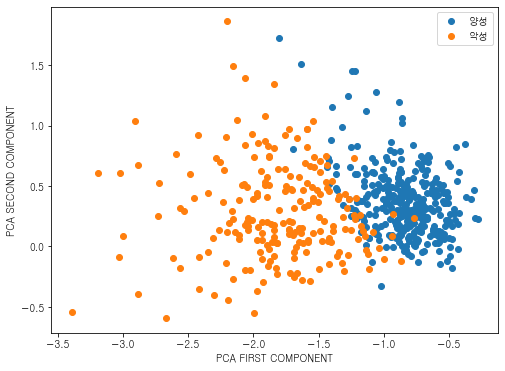

In [267]:
# PCA 구현
# 1. 2D SPACE 축소
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


DATA_COV=np.cov(DATA_norm.T)
print('eigenvector 수: ',DATA_COV.shape[1])

#decomposition 후, eigen value가 높은 두 벡터 선택.
## 추후, 자동으로 두개 선택하도록 고쳐야함.
eig_vals, eig_vecs=np.linalg.eig(DATA_COV)
print("데이터 유지 비율: ", np.sum(eig_vals[0:2])/np.sum(eig_vals))
U=eig_vecs[:,0:2]

#데이터 사영
DATA_PCA=DATA_norm.dot(U)


DATA_PCA.columns=['PCA1','PCA2']

fig =plt.figure(figsize=(8,6))
benign= DATA_PCA[raw_data['target']==1] #양성
malignant = DATA_PCA[raw_data['target']==0] #악성

plt.scatter(benign.iloc[:,0],benign.iloc[:,1],label='양성')
plt.scatter(malignant.iloc[:,0],malignant.iloc[:,1],label='악성')

plt.xlabel('PCA FIRST COMPONENT')
plt.ylabel('PCA SECOND COMPONENT')
plt.legend()
plt.show()

# eigen vector는 상수배를 하면 달라지기 때문에, 방향이 다를 수 도 있다.

In [261]:
DATA_PCA.head()

,PCA1,PCA2
0,-2.590770,0.762974
1,-1.666057,-0.220868
2,-2.158371,0.226378
3,-2.204565,1.861168
4,-1.830577,0.033608


## 2. PCA components의 feature importance visualization

U행렬. 주성분의 값을 활용해, feature importance 확인.



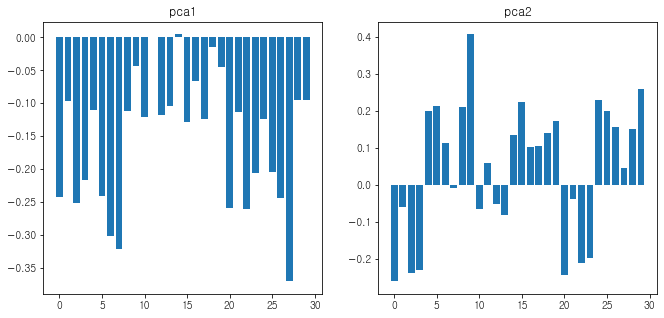

In [268]:
#feature visualization
import seaborn as sns

U_df=pd.DataFrame(U.T)
U_df.columns=raw_data.feature_names
U_df.index=['PCA1','PCA2']
U_df

fig =plt.figure(figsize=(11,11))

plt.subplot(221),plt.title("pca1")# 2행 2열중 1번째
plt.bar(np.arange(30),U_df.loc['PCA1',:])

plt.subplot(222),plt.title("pca2")# 2행 2열중 1번째
plt.bar(np.arange(30),U_df.loc['PCA2',:])

plt.show()

In [264]:
U_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PCA1,-0.242676,-0.096479,-0.25255,-0.216495,-0.109695,-0.240398,-0.301914,-0.322475,-0.111432,-0.043298,...,-0.259387,-0.113833,-0.260708,-0.205918,-0.123774,-0.204993,-0.244084,-0.371065,-0.095923,-0.094634
PCA2,-0.261317,-0.059058,-0.23859,-0.231107,0.199884,0.213915,0.113811,-0.008312,0.211115,0.406392,...,-0.244282,-0.039682,-0.211635,-0.198979,0.229455,0.198064,0.154982,0.044329,0.151169,0.258092


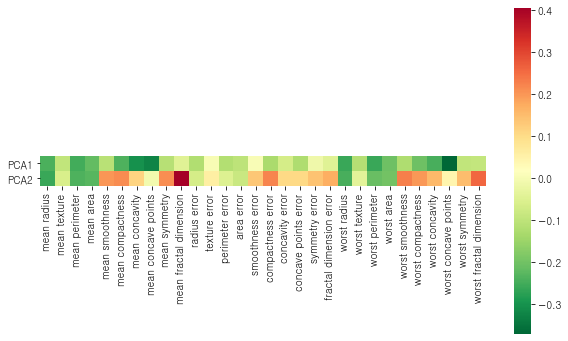

In [269]:
fig =plt.figure(figsize=(10,6))
ax = sns.heatmap(U_df,
                 cmap='RdYlGn_r',# cmap Color
                 annot=False,            # Value Text
                 square=True,
                )
#PCA1과 PCA2 모두 각자 다른 feature가 높다.

---

PCA 라이브러리 활용

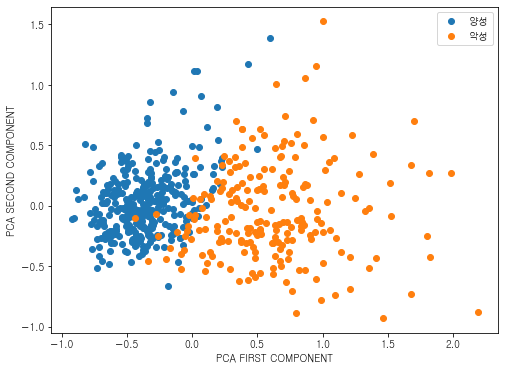

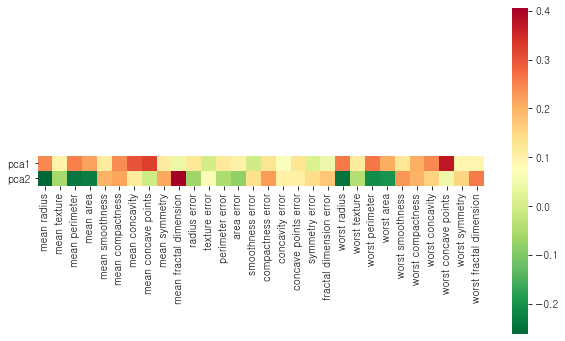

In [229]:
# pca 라이브러리 활용.
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

df2 = pd.DataFrame(raw_data['data'],columns=raw_data['feature_names'])
scaler=MinMaxScaler()
scaler.fit(df2)
scaled_data=scaler.transform(df2)
pca2=PCA(n_components=2)
pca2.fit(scaled_data)

pca2_data=pca2.transform(scaled_data)
pca2_df=pd.DataFrame(pca2_data,columns=['PCA1','PCA2'])

fig =plt.figure(figsize=(8,6))
benign2= pca2_df[raw_data['target']==1] #양성
malignant2 = pca2_df[raw_data['target']==0] #악성

plt.scatter(benign2.iloc[:,0],benign2.iloc[:,1],label='양성')
plt.scatter(malignant2.iloc[:,0],malignant2.iloc[:,1],label='악성')

plt.xlabel('PCA FIRST COMPONENT')
plt.ylabel('PCA SECOND COMPONENT')
plt.legend()
plt.show()
pca2_components_df=pd.DataFrame(pca2.components_,columns=raw_data['feature_names'],index=['pca1','pca2'])

fig =plt.figure(figsize=(10,6))
ax = sns.heatmap(pca2_components_df,
                 cmap='RdYlGn_r',# cmap Color
                 annot=False,            # Value Text
                 square=True,
                )

In [230]:
pca2_df.head(5)

,PCA1,PCA2
0,1.387021,0.426895
1,0.462308,-0.556947
2,0.954621,-0.109701
3,1.000816,1.525089
4,0.626828,-0.302471


---

참조. 

https://losskatsu.github.io/machine-learning/sklearn/#%EA%B0%80%EC%83%81-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%9E%9C%EB%8D%A4%EC%9C%BC%EB%A1%9C-%EC%83%9D%EC%84%B1%ED%95%98%EA%B8%B0

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

https://jfun.tistory.com/108

https://blog.naver.com/pmw9440/221843085568 : pca의 역할

https://blog.naver.com/pmw9440/221843886378 :왜 정규화를 해야하는지. 각 원소별 load

https://soo-jjeong.tistory.com/122 :min-max scaler 설명

https://www.youtube.com/watch?v=QdBy02ExhGI : 시각화
https://rfriend.tistory.com/419 : sns heatmap의 cmap 종류들